In [5]:
import json
import matplotlib.pyplot as plt
import io

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
uploaded = files.upload()

# Extract epoch and F1 score from a JSON object
def extract_epoch_f1(data):
    epoch = None
    f1 = None
    if 'epoch' in data:
        epoch = data['epoch']
    # Try common keys for F1 score
    if 'eval_f1' in data:
        f1 = data['eval_f1']
    return epoch, f1

# each file = session = run
all_runs = []

Saving log-train-2025-03-31T17_57_15.268650.jsonl to log-train-2025-03-31T17_57_15.268650 (2).jsonl
Saving log-train-2025-03-31T18_03_30.564403.jsonl to log-train-2025-03-31T18_03_30.564403 (2).jsonl
Saving log-train-2025-03-31T18_08_58.586050.jsonl to log-train-2025-03-31T18_08_58.586050 (2).jsonl


In [9]:
# Process each uploaded file
for filename in uploaded.keys():
    epochs = []
    f1_values = []
    # Read file content using io.StringIO
    content = uploaded[filename].decode('utf-8')
    file_io = io.StringIO(content)
    for line in file_io:
        line = line.strip()
        if not line:
            continue  # Skip empty lines
        try:
            data = json.loads(line)
            epoch, f1 = extract_epoch_f1(data)
            if epoch is not None and f1 is not None:
                epochs.append(epoch)
                f1_values.append(f1)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in file {filename}: {e}")

    if epochs and f1_values:
        # Sort data by epoch in case the lines are not in order
        sorted_data = sorted(zip(epochs, f1_values), key=lambda x: x[0])
        epochs, f1_values = zip(*sorted_data)
        all_runs.append((list(epochs), list(f1_values)))
        # Print basic analysis for this run
        print(f"Analysis for file {filename}:")
        print(f"  - Initial F1: {f1_values[0]}")
        print(f"  - Final F1: {f1_values[-1]}")
        print(f"  - Maximum F1: {max(f1_values)}\n")
    else:
        print(f"No valid epoch/F1 data found in file {filename}.")

Analysis for file log-train-2025-03-31T17_57_15.268650 (2).jsonl:
  - Initial F1: 0.1238001107255197
  - Final F1: 0.1238001107255197
  - Maximum F1: 0.1238001107255197

Analysis for file log-train-2025-03-31T18_03_30.564403 (2).jsonl:
  - Initial F1: 0.10504212465169568
  - Final F1: 0.10504212465169568
  - Maximum F1: 0.10504212465169568

Analysis for file log-train-2025-03-31T18_08_58.586050 (2).jsonl:
  - Initial F1: 0.13914321668356427
  - Final F1: 0.5745280092962626
  - Maximum F1: 0.5745280092962626



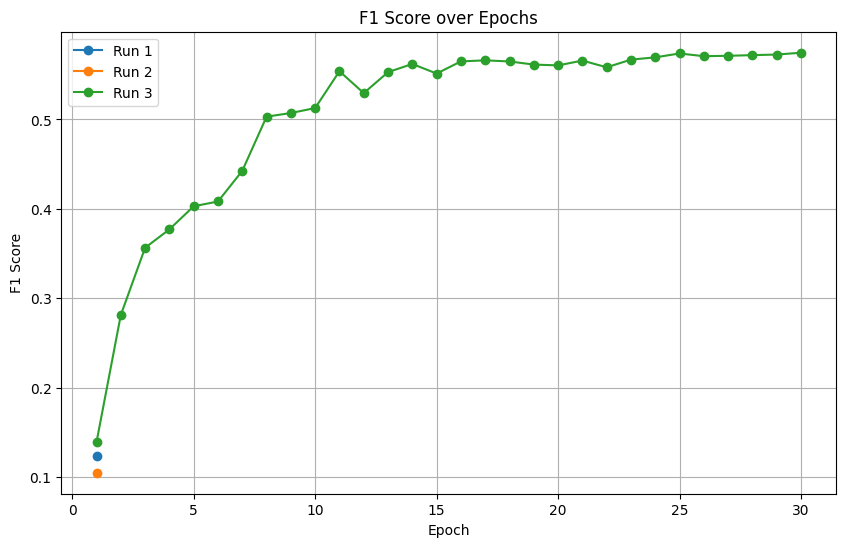

In [10]:
plt.figure(figsize=(10, 6))
for i, (epochs, f1_values) in enumerate(all_runs):
    plt.plot(epochs, f1_values, marker='o', label=f'Run {i+1}')

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.grid(True)
plt.show()

###After processing the logs, I observed that:###

*   Only the third session gave F1 results for different epochs;
*   File 1 and 2 gave only one F1 metric: *Initial F1 = Final F1 = Maximum F1 = 0.1238001107255197* in the 1st log file, and *Initial F1 = Final F1 = Maximum F1 = 0.10504212465169568* in the 2nd log file;
*   In each run, the F1 score tends to improve as the epochs increase, suggesting that the classifier is learning and converging;
*   There are minor fluctuations between runs. For instance, one run might start with a slightly lower F1 but catch up by later epochs;
*   The F1 improvement slows down after a certain number of epochs (a plateau), which is common in training scenarios as the model nears convergence.

